In [27]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ta
import mplfinance as mpf
from itertools import product

In [2]:
from src.DataUpdateModule import DataUpdateModule
DUM = DataUpdateModule()

In [3]:
df_stock, df_options = DUM.read_data(datetime(2022,1,7))

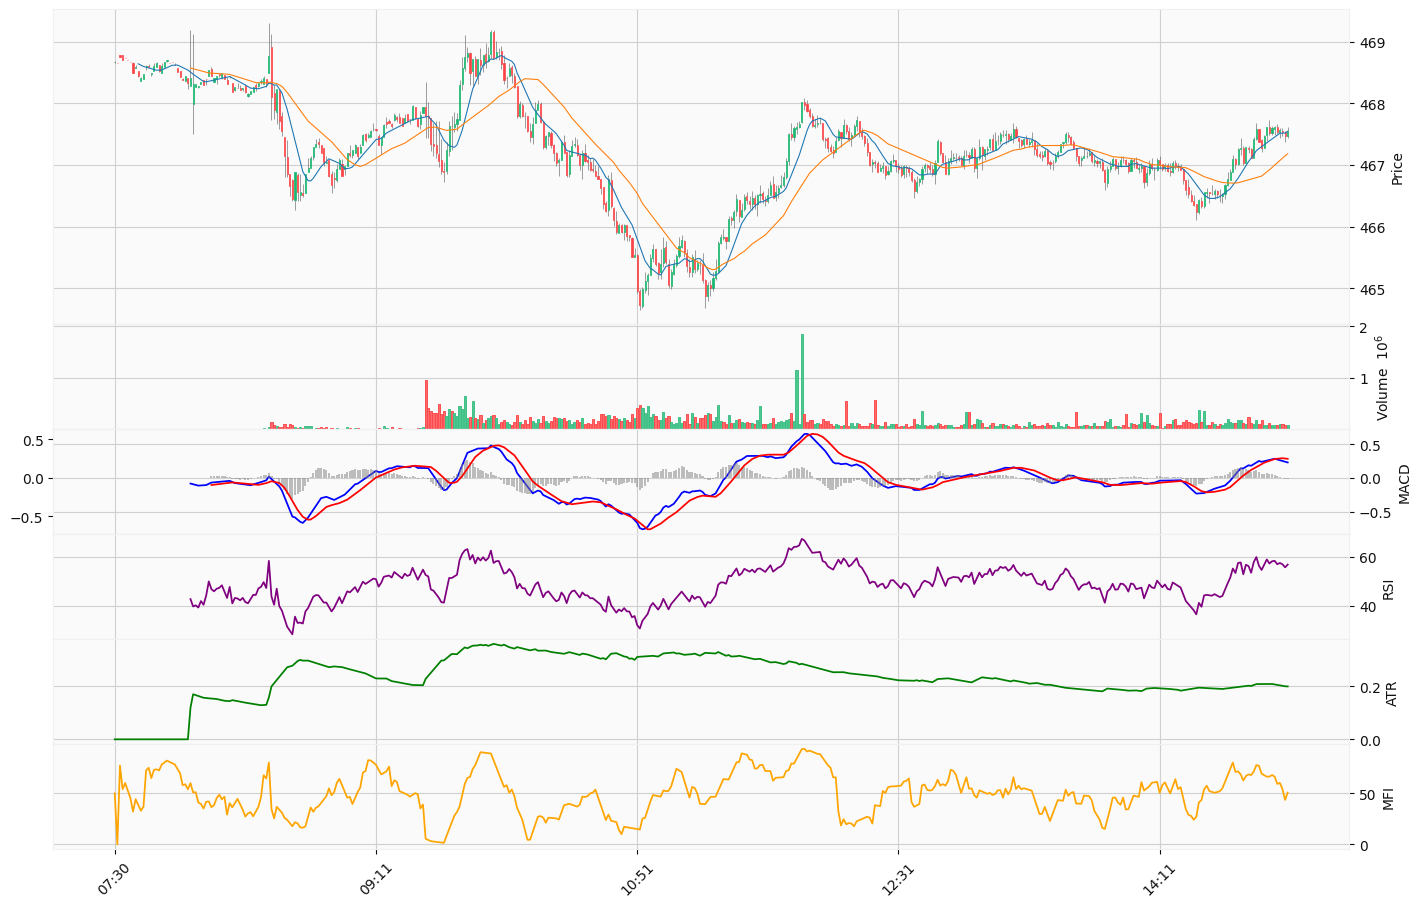

In [25]:
# Calculate indicators using ta package
df_stock['RSI'] = ta.momentum.RSIIndicator(df_stock['close'], window=30).rsi()
df_stock['MACD'] = ta.trend.MACD(df_stock['close'], window_fast=10, window_slow=30).macd()
df_stock['MACD_signal'] = ta.trend.MACD(df_stock['close'], window_fast=10, window_slow=30).macd_signal()
df_stock['MACD_diff'] = ta.trend.MACD(df_stock['close'], window_fast=10, window_slow=30).macd_diff()
df_stock['ATR'] = ta.volatility.AverageTrueRange(df_stock['high'], df_stock['low'], df_stock['close'], window=30).average_true_range()
df_stock['MFI'] = ta.volume.MFIIndicator(df_stock['high'], df_stock['low'], df_stock['close'], df_stock['volume'], window=14, fillna=True).money_flow_index()

# Create additional plots for indicators
apds = [
    mpf.make_addplot(df_stock['MACD'], panel=2, color='blue', ylabel='MACD'),
    mpf.make_addplot(df_stock['MACD_signal'], panel=2, color='red'),
    mpf.make_addplot(df_stock['MACD_diff'], panel=2, type='bar', color='gray', alpha=0.5),
    mpf.make_addplot(df_stock['RSI'], panel=3, color='purple', ylabel='RSI'),
    mpf.make_addplot(df_stock['ATR'], panel=4, color='green', ylabel='ATR'),
    mpf.make_addplot(df_stock['MFI'], panel=5, color='orange', ylabel='MFI'),
]

# Plot with all indicators
mpf.plot(
    df_stock, type="candle", mav=(10, 30), volume=True, 
    addplot=apds, style="yahoo", figsize=(18, 12),
    panel_ratios=(6,2,2,2,2,2)
)

# mpf.plot(df_stock, type = "candle", mav = (10, 30), volume = True, style = "yahoo", figsize = (18,8))

In [ ]:
params_grid = {
    "fast": [5, 10, 20], #sma|rsi|macd
    "mult": [2, 3, 5], # sma|rsi|macd, for ATR also
}

for params in product(*params_grid.values()):
    
    sma_fast = params[0]
    sma_slow = sma_fast * params[1]
    print(f"SMA Fast: {sma_fast}, SMA Slow: {sma_slow}")

In [30]:
list(product(*params_grid.values()))

[(5, 2), (5, 3), (5, 5), (10, 2), (10, 3), (10, 5), (20, 2), (20, 3), (20, 5)]

In [ ]:
# SMA_fast > SMA_slow

# MACD diff > 0

# RSI not > 60

In [ ]:
# MACD_signal 10 steps negative gradient

# RSI > 60

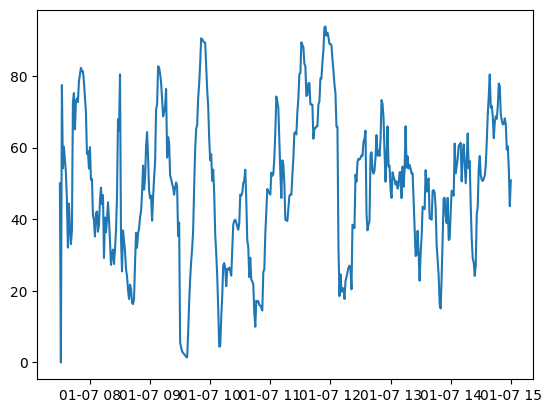

In [ ]:
plt.plot()